In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
data = pd.read_csv('C:/users/Neal/Downloads/purple_data/full_sweep_purple_100mv.csv', nrows=1200)


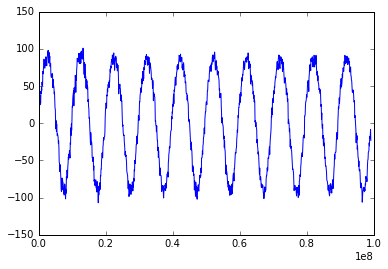

In [9]:
plt.plot(data['Time (us)'], data['Volts (mV)'])
plt.show()

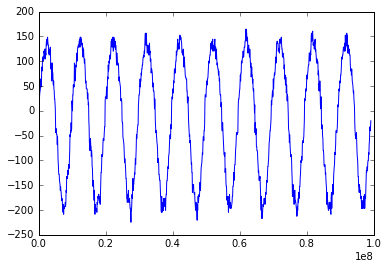

In [10]:
plt.plot(data['Time (us)'], data['Amps (mA)'])
plt.show()

In [12]:
data2 = pd.read_csv('C:/users/Neal/Downloads/purple_data/full_sweep_purple_50mv.csv', nrows=1200, skiprows=1201)

In [13]:
data2.head()

,Time (us),Volts (mV),Amps (mA),Frequency (Hz)
0,0,2.24,-2.68,2.0
1,41365,8.13,2.67,NaN
2,82728,8.66,40.11,NaN
3,124090,12.41,5.35,NaN
4,165456,0.37,21.39,NaN


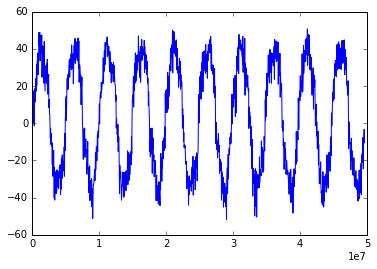

In [14]:
plt.plot(data2['Time (us)'], data2['Volts (mV)'])
plt.show()

In [18]:
full_data = pd.read_csv('C:/users/Neal/Downloads/purple_data/full_sweep_purple_100mv.csv')
full_data.shape

(45637, 4)

In [45]:
#Parse the data
full_data = np.array(full_data)
tally=[]
for i in range(full_data.shape[0]):
    if str(full_data[i][3]) != 'nan':
        if str(full_data[i][3])!= 'Frequency (Hz)':
            tally.append(i)
            print float(full_data[i,3])/10
print tally

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
150.0
200.0
250.0
300.0
350.0
400.0
450.0
[0, 1201, 2402, 3603, 4804, 6005, 7206, 8407, 9608, 10809, 12010, 13211, 14412, 15613, 16814, 18015, 19216, 20417, 21618, 22819, 24020, 25221, 26422, 27623, 28824, 30025, 31226, 32427, 33628, 34829, 36030, 37231, 38432, 39633, 40834, 42035, 43236, 44437]


In [16]:
fig = plt.figure(1, figsize=(5,5))

for i in range(len(full_data)/1200-1):
    data = full_data.loc[1201*i:1201*i+1199]
    f = data['Frequency (Hz)'].iloc[0]
    
    t = data['Time (us)'].astype(float)
    v = data['Volts (mV)'].astype(float)
    i = data['Amps (mA)'].astype(float)
    
    print (t[-1] - t[0])*f
    
    plt.plot(t, v)
    
plt.show()

KeyError: -1L